In [3]:
# !pip install tensorflow
import tensorflow as tf


# Escalar (0D)
scalar = tf.constant(7.2)
print("Escalar:", scalar)

# Vector (1D)
vector = tf.constant([10, 20, 30])
print("Vector:", vector)

# Matriz (2D)
matrix = tf.constant([[1, 2], [3, 4]])
print("Matriz:\n", matrix)

# Tensor 3D
tensor3d = tf.random.uniform(shape=(2, 3, 4))  # valores aleatorios entre 0 y 1
print("Tensor 3D:\n", tensor3d)


# PROPIEDADES INTERESANTES PARA TRABAJAR CON TENSORES

print("Forma del tensor:", matrix.shape)
print("Rango (número de dimensiones):", tf.rank(matrix))
print("Tipo de datos:", matrix.dtype)


# Operaciones básicas

a = tf.constant([[1, 2], [3, 4]])
b = tf.constant([[5, 6], [7, 8]])

# Suma
print("Suma:\n", tf.add(a, b))

# Producto elemento a elemento
print("Multiplicación elemento a elemento:\n", tf.multiply(a, b)) # Multiplica cada elemento en la misma posición de las dos matrices/vectores....

# Producto matricial (dot product)
print("Producto matricial:\n", tf.matmul(a, b))

# Transpuesta
print("Transpuesta:\n", tf.transpose(a))

# Reducción (suma total de elementos)
print("Suma total de elementos:", tf.reduce_sum(a))

tensor = tf.constant([[10, 20, 30], [40, 50, 60]])

# Acceder a un elemento
print("Elemento [1,2]:", tensor[1, 2])

# Seleccionar la primera fila
print("Primera fila:", tensor[0])

# Todas las filas, segunda columna
print("Segunda columna:", tensor[:, 1])

original = tf.constant([[1, 2, 3], [4, 5, 6]])
reshaped = tf.reshape(original, (3, 2))
print("Tensor reestructurado:\n", reshaped)

Escalar: tf.Tensor(7.2, shape=(), dtype=float32)
Vector: tf.Tensor([10 20 30], shape=(3,), dtype=int32)
Matriz:
 tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)
Tensor 3D:
 tf.Tensor(
[[[4.04238701e-04 9.54200387e-01 6.58051014e-01 7.39728212e-02]
  [1.68391705e-01 5.29776812e-01 7.37684727e-01 2.58521318e-01]
  [3.58310580e-01 4.17112112e-02 9.64749336e-01 7.12436080e-01]]

 [[6.37419939e-01 7.97760129e-01 1.00997806e-01 4.70608473e-02]
  [8.99752498e-01 7.76683092e-01 9.46099758e-02 5.21275640e-01]
  [8.99250865e-01 8.60304356e-01 6.98293805e-01 3.22085261e-01]]], shape=(2, 3, 4), dtype=float32)
Forma del tensor: (2, 2)
Rango (número de dimensiones): tf.Tensor(2, shape=(), dtype=int32)
Tipo de datos: <dtype: 'int32'>
Suma:
 tf.Tensor(
[[ 6  8]
 [10 12]], shape=(2, 2), dtype=int32)
Multiplicación elemento a elemento:
 tf.Tensor(
[[ 5 12]
 [21 32]], shape=(2, 2), dtype=int32)
Producto matricial:
 tf.Tensor(
[[19 22]
 [43 50]], shape=(2, 2), dtype=int32)
Transpuesta:
 tf.Tensor(
[

In [4]:
img_grayscale = tf.random.uniform(shape=(28, 28), minval=0, maxval=1)
print("Forma:", img_grayscale.shape)  # (28, 28)

img_rgb = tf.random.uniform(shape=(32, 32, 3), minval=0, maxval=1)
print("Forma:", img_rgb.shape)  # (32, 32, 3)

batch = tf.random.uniform(shape=(64, 32, 32, 3))
print("Forma:", batch.shape)  # (64, 32, 32, 3)

Forma: (28, 28)
Forma: (32, 32, 3)
Forma: (64, 32, 32, 3)


Forma: (300, 200, 3)


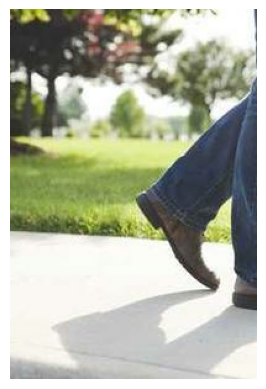

In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Descargar y cargar una imagen
path = tf.keras.utils.get_file("image.jpg", "https://picsum.photos/200/300")
img = tf.io.read_file(path)
img = tf.image.decode_jpeg(img, channels=3)  # aseguramos que tenga 3 canales
img = tf.image.convert_image_dtype(img, tf.float32)  # escala 0–1

print("Forma:", img.shape)  # Ej. (300, 200, 3)
plt.imshow(img)
plt.axis('off')
plt.show()

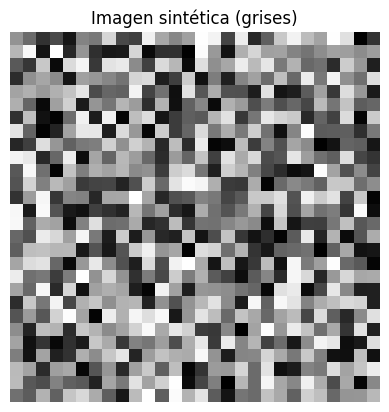

In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Crear una imagen de 28x28 con valores aleatorios entre 0 y 1
img_gray = tf.random.uniform(shape=(28, 28), minval=0, maxval=1)

# Mostrar la imagen
plt.imshow(img_gray, cmap='gray')
plt.title("Imagen sintética (grises)")
plt.axis('off')
plt.show()

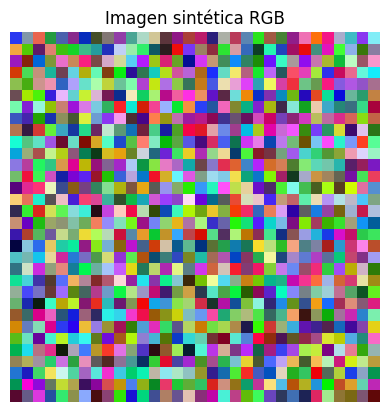

In [7]:
# Imagen 32x32 con 3 canales (RGB)
img_rgb = tf.random.uniform(shape=(32, 32, 3), minval=0, maxval=1)

# Mostrar la imagen
plt.imshow(img_rgb)
plt.title("Imagen sintética RGB")
plt.axis('off')
plt.show()

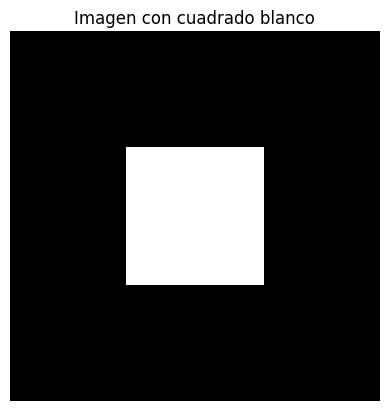

In [8]:
import numpy as np

# Crear un fondo negro 64x64
image = np.zeros((64, 64), dtype=np.float32)

# Dibujar un cuadrado blanco en el centro
image[20:44, 20:44] = 1.0

# Convertir a tensor de TensorFlow
img_tensor = tf.convert_to_tensor(image)

# Mostrar
plt.imshow(img_tensor, cmap='gray')
plt.title("Imagen con cuadrado blanco")
plt.axis('off')
plt.show()

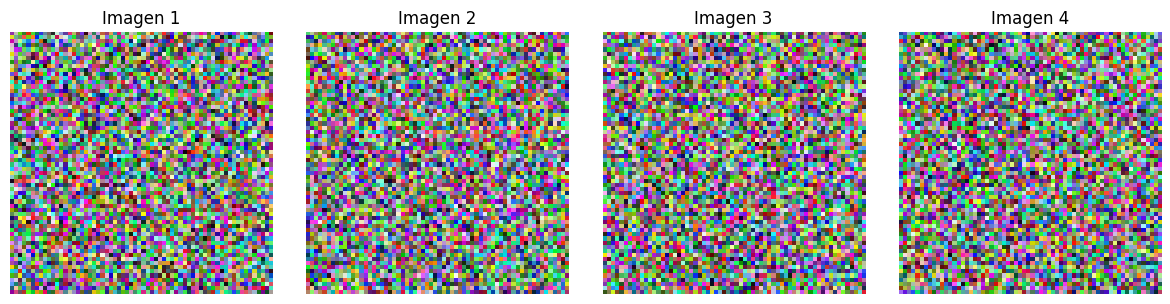

In [9]:
# Crear un batch de 8 imágenes RGB de 64x64
batch = tf.random.uniform(shape=(8, 64, 64, 3), minval=0, maxval=1)

# Mostrar las primeras 4
fig, axs = plt.subplots(1, 4, figsize=(12, 3))
for i in range(4):
    axs[i].imshow(batch[i])
    axs[i].axis('off')
    axs[i].set_title(f'Imagen {i+1}')
plt.tight_layout()
plt.show()

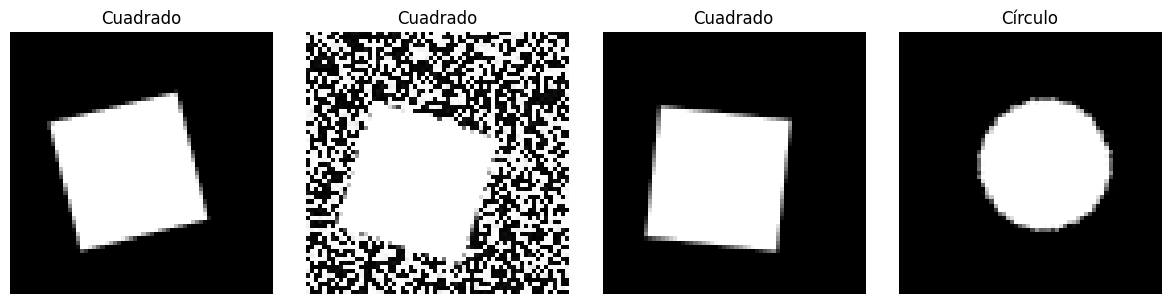

In [10]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

IMG_SIZE = 64

def apply_random_transform(image):
    size = image.shape[0]

    # 1. Rotación
    angle = np.random.uniform(-30, 30)
    center = (size // 2, size // 2)
    rot_mat = cv2.getRotationMatrix2D(center, angle, 1.0)
    image = cv2.warpAffine(image, rot_mat, (size, size), borderValue=0)

    # 2. Desplazamiento (translación)
    tx = np.random.randint(-5, 6)
    ty = np.random.randint(-5, 6)
    trans_mat = np.float32([[1, 0, tx], [0, 1, ty]])
    image = cv2.warpAffine(image, trans_mat, (size, size), borderValue=0)

    # 3. Ruido aleatorio
    if np.random.rand() < 0.3:
        noise = np.random.normal(0, 10, image.shape).astype(np.uint8)
        image = cv2.add(image, noise)

    return image

def create_shape_image(shape_type, size=IMG_SIZE):
    img = np.zeros((size, size), dtype=np.uint8)

    if shape_type == 0:  # cuadrado
        margin = size // 4
        img[margin:-margin, margin:-margin] = 255

    elif shape_type == 1:  # círculo
        center = (size // 2, size // 2)
        radius = size // 4
        cv2.circle(img, center, radius, 255, -1)

    elif shape_type == 2:  # triángulo
        top = (size // 2, size // 4)
        left = (size // 4, 3 * size // 4)
        right = (3 * size // 4, 3 * size // 4)
        pts = np.array([top, left, right], np.int32)
        cv2.fillPoly(img, [pts], 255)

    elif shape_type == 3:  # estrella
        center = (size // 2, size // 2)
        radius_outer = size // 4
        radius_inner = size // 8
        points = []
        for i in range(10):
            angle = np.deg2rad(i * 36)
            r = radius_outer if i % 2 == 0 else radius_inner
            x = int(center[0] + r * np.cos(angle))
            y = int(center[1] + r * np.sin(angle))
            points.append((x, y))
        pts = np.array(points, np.int32)
        cv2.fillPoly(img, [pts], 255)

    return apply_random_transform(img)

def generate_augmented_multiclass_dataset(n_per_class=1000, size=IMG_SIZE):
    images = []
    labels = []

    for label in range(4):  # 0: cuadrado, 1: círculo, 2: triángulo, 3: estrella
        for _ in range(n_per_class):
            img = create_shape_image(label, size)
            images.append(img)
            labels.append(label)

    X = np.array(images).astype(np.float32) / 255.0
    X = np.expand_dims(X, axis=-1)
    y = np.array(labels)
    return X, y

X_aug, y_aug = generate_augmented_multiclass_dataset(n_per_class=3)

labels_dict = {0: 'Cuadrado', 1: 'Círculo', 2: 'Triángulo', 3: 'Estrella'}
fig, axs = plt.subplots(1, 4, figsize=(12, 3))
for i in range(4):
    axs[i].imshow(X_aug[i].squeeze(), cmap='gray')
    axs[i].set_title(labels_dict[y_aug[i]])
    axs[i].axis('off')
plt.tight_layout()
plt.show()

In [11]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(4, activation='softmax')  # 4 clases
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

/Users/gmr/Desktop/master/.venv/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
from sklearn.model_selection import train_test_split

# Generar dataset aumentado
X, y = generate_augmented_multiclass_dataset(n_per_class=1000)

# Dividir en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar
history = model.fit(X_train, y_train, epochs=10, batch_size=32,
                    validation_data=(X_test, y_test))

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.7450 - loss: 0.6697 - val_accuracy: 0.9900 - val_loss: 0.0437
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9964 - loss: 0.0223 - val_accuracy: 0.9962 - val_loss: 0.0081
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 1.0000 - loss: 5.4281e-04 - val_accuracy: 1.0000 - val_loss: 0.0010
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 1.0000 - loss: 3.1437e-04 - val_accuracy: 1.0000 - val_loss: 6.5166e-04
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 1.0000 - loss: 2.1222e-04 - val_accuracy: 1.0000 - val_loss: 6.1257e-04
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 1.0000 - loss: 1.9416e-04 - val_accuracy: 1.0000 - val_loss: 4.0029e-04
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 1.00

In [13]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Precisión en test: {test_acc:.2%}")

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 2.8967e-04
Precisión en test: 100.00%


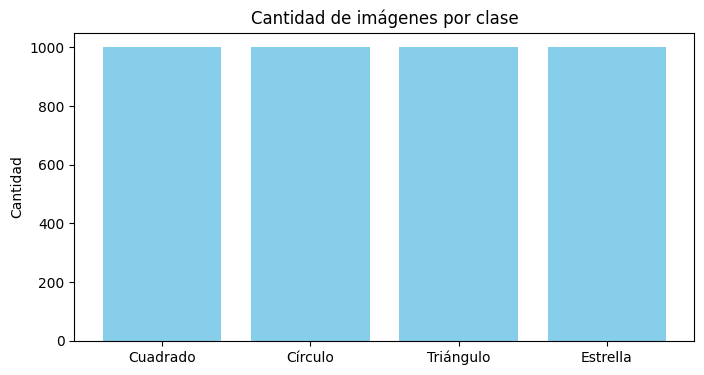

In [14]:
import matplotlib.pyplot as plt

# Conteo por clase
counts = np.bincount(y)

# Etiquetas
labels = ['Cuadrado', 'Círculo', 'Triángulo', 'Estrella']

# Gráfico de barras
plt.figure(figsize=(8, 4))
plt.bar(labels, counts, color='skyblue')
plt.title("Cantidad de imágenes por clase")
plt.ylabel("Cantidad")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


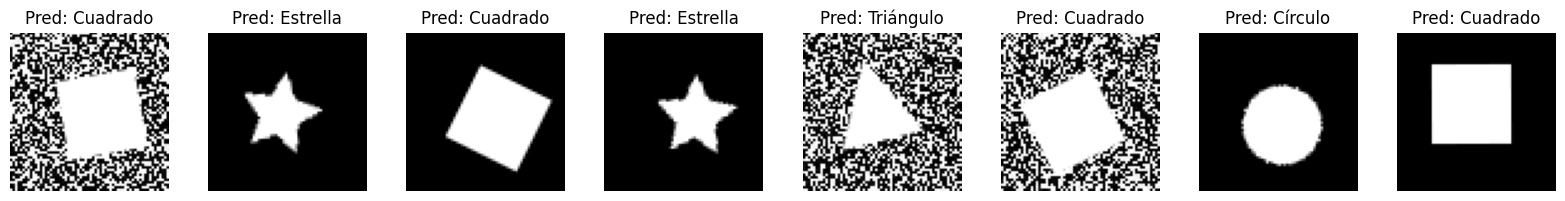

In [15]:
preds = model.predict(X_test[:8])
pred_classes = np.argmax(preds, axis=1)

fig, axs = plt.subplots(1, 8, figsize=(16, 2))
for i in range(8):
    axs[i].imshow(X_test[i].squeeze(), cmap='gray')
    axs[i].set_title(f"Pred: {labels[pred_classes[i]]}")
    axs[i].axis('off')
plt.tight_layout()
plt.show()